# data analytics for Dartpost

### undetecability for a sock account

We define the undetectability of a sock account a to be $undet(a)=1/e^{(T-D_a)}$ where T is the total time (6 days) and D_a is T if the sock is undetected or the earliest day on which a was reported to be a sock. Thus, an undetected sock would have a success rate of 1.

### undetectability for a sock creation strategy

We define the undetectability of a sock creation strategy S to be $undet(S) = \frac{\sum_{a\in Create(S)} undet(a) }{|Create(S)|}$ where Create(S) is the set of sock accounts created using strategy S.


In [38]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.size":12,
})

In [2]:
df_users = pd.read_csv("./data/users", delimiter="\t")
df_follow = pd.read_csv("./data/follow", delimiter="\t")
df_report= pd.read_csv("./data/reportusers", delimiter="\t")

In [3]:
df_socks = pd.read_csv("./assigns/sockpuppet_assigned.csv")

In [85]:
df_posts = pd.read_csv("./data/posts_processed.csv")
df_comments = pd.read_csv("./data/comments", delimiter="\t")

In [4]:
print(f"{df_report.shape[0]} {df_socks.shape[0]}")
display(df_users.head())
display(df_report.head())
display(df_socks.head())

46 40


,id,email,username,password,firstName,lastName,fullName,profilePic,isMod,isObserver,instructions,createdAt,updatedAt,isPuppet,suspicious,disabled
0,2291,Molly_5327@observer.com,Molly_5327,$2a$10$QTEDCQ/MN/c.0S6snISLoOVxElZZd4rrumatMIA...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,https://docs.google.com/document/d/e/2PACX-1vS...,2020-09-03 00:53:34.784+00,2020-09-03 00:53:34.784+00,f,f,f
1,1976,miho@dartpost.com,miho,$2a$10$9NrDj7dEYDHgK4vL0kTCbOmY07dM/ptcF2dVD8J...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-08-28 20:01:01.253+00,2020-08-28 20:01:01.253+00,f,f,f
2,1977,ModBessler@dartpost.org,ModB,$2a$10$iyHu9zlIoZ5JW7ErGgfCvueRa3tMGPfx6GlkE//...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-08-28 20:15:20.792+00,2020-08-28 20:15:20.792+00,f,f,f
3,2292,Luke_6520@observer.com,Luke_6520,$2a$10$FpS2QW9J/S4aMJcTiQygGuyMwT7y57XEz/0MW33...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,t,https://docs.google.com/document/d/e/2PACX-1vS...,2020-09-03 00:53:35.103+00,2020-09-03 00:53:35.103+00,f,f,f
4,1980,dapang@dartpost.com,RuiboLiu,$2a$10$dxRTsGeeutRAWhpYOGTwwek2x2CgGxvKeEfKmqQ...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,t,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-08-28 20:20:59.307+00,2020-08-28 20:20:59.307+00,f,f,f


,id,report,createdAt,updatedAt,ReporterId,SuspectId
0,14,They do not go into enough detail and do not d...,2020-09-03 03:24:23.636+00,2020-09-03 03:24:23.636+00,2638,2604
1,15,"His comment, “thank you China,” is inappropria...",2020-09-03 19:38:37.22+00,2020-09-03 19:38:37.22+00,2593,2560
2,16,I think it is a bot account,2020-09-03 20:21:50.501+00,2020-09-03 20:21:50.501+00,2588,2604
3,17,Possible bot,2020-09-03 20:40:12.567+00,2020-09-03 20:40:12.567+00,2588,2638
4,18,Bot?,2020-09-04 13:31:00.079+00,2020-09-04 13:31:00.079+00,2588,2658


,email,username,password,sock,topic_0,pos_0,topic_1,pos_1,topic_2,pos_2,strategy,turk_ids
0,Connor_6191@sockpuppet.com,Connor_6191,zefbfh,0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F
1,Luke_1653@sockpuppet.com,Luke_1653,iyjfba,0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F
2,Cody_1227@sockpuppet.com,Cody_1227,omlrmf,0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F
3,Diamond_8596@sockpuppet.com,Diamond_8596,eooivq,0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F
4,Carly_7033@sockpuppet.com,Carly_7033,njuvpb,0,How strongly do you favor or oppose the use of...,Strongly oppose,How likely is it that the Dow Jones will end t...,Yes,How strongly would you approve or disapprove o...,Strongly disapprove,UNRESTRICTED,AVMBUHD8M055F


In [5]:
stop_time = pd.to_datetime("2020-09-08 23:59:59+00")
day_timedelta = pd.Timedelta(1, "day")
total_timedelta = pd.Timedelta(1, "day")

### process reports

In [6]:
report_clean = df_report[["SuspectId", "createdAt"]].groupby("SuspectId").min().reset_index()
report_clean["ReportToLast"] = (pd.to_datetime(report_clean["createdAt"]) - stop_time) / day_timedelta
report_clean = report_clean[["SuspectId", "ReportToLast"]]

In [50]:
df_puppet = df_users[df_users["isPuppet"] == "t"]

df_puppet = pd.merge(df_puppet, report_clean, left_on="id", right_on="SuspectId", how="left").drop("SuspectId", axis=1)
display(df_report)

,id,email,username,password,firstName,lastName,fullName,profilePic,isMod,isObserver,instructions,createdAt,updatedAt,isPuppet,suspicious,disabled,ReportToLast
0,2361,Connor_6191@sockpuppet.com,Connor_6191,$2a$10$bYgxFkelOI/Dh7FT3VueauwjLduc7NuLBCYMwAt...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:03.889+00,2020-09-03 00:54:03.889+00,t,f,f,NaN
1,2362,Luke_1653@sockpuppet.com,Luke_1653,$2a$10$DsluHTIVhBttlyuY7YZkV.3p03vmUQlj3UPETO5...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:04.203+00,2020-09-03 00:54:04.203+00,t,f,f,NaN
2,2363,Cody_1227@sockpuppet.com,Cody_1227,$2a$10$2UePrawHqbpYWPI/dTV1z.1StOn/IOkLkLxOF5H...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:04.514+00,2020-09-03 00:54:04.514+00,t,f,f,NaN
3,2364,Diamond_8596@sockpuppet.com,Diamond_8596,$2a$10$pJkhMHO1miHgau1oJxd9/OYq6aZy3gngu0y0zwB...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:04.808+00,2020-09-03 00:54:04.808+00,t,f,f,NaN
4,2365,Carly_7033@sockpuppet.com,Carly_7033,$2a$10$nFtgXKfuL8mc530YZlE0qOzxdjuftyMGmvztbJC...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:05.154+00,2020-09-03 00:54:05.154+00,t,f,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2731,Diamond_2047@sockpuppet.com,Diamond_2047,$2a$10$KeA2NVfaA6TCfLLb5rix0uo5PqjEh3BipyGI4K6...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 01:00:35.898+00,2020-09-03 01:00:35.898+00,t,f,f,NaN
206,2732,Jamal_4474@sockpuppet.com,Jamal_4474,$2a$10$uxtaW2BgvdvKuI8FbmCcruRkiUWv7axwgqzmIPw...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.us-east-2....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 01:01:30.538+00,2020-09-03 01:01:30.538+00,t,f,f,NaN
207,2407,Allison_8369@sockpuppet.com,Allison_8369,$2a$10$CjE8irD2A2OQyJLedob7wOQndtgyyuhB7QFkd0h...,Allison,Lockheart,NaN,https://dartmouth-socialplatform.s3.amazonaws....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:54:19.096+00,2020-09-03 14:02:36.455+00,t,f,f,NaN
208,2540,Malik_3915@sockpuppet.com,Malik_3915,$2a$10$eVZuaj10DIhZ5nwfREH0T.6TL.h9MDRaDlgWGRr...,NaN,NaN,NaN,https://dartmouth-socialplatform.s3.amazonaws....,f,f,https://docs.google.com/document/d/e/2PACX-1vQ...,2020-09-03 00:55:02.796+00,2020-09-05 12:08:15.431+00,t,f,f,NaN


In [88]:
df_posts["root_id"][~df_posts["root_id"].isna()].astype(int)

25        93
26       109
54       129
103       93
147      150
        ... 
1047     996
1056    1010
1061    1032
1068    1042
1069    1036
Name: root_id, Length: 123, dtype: int64

In [100]:
df_posts.tail()

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
1079,1172,US corona virus surge: ‘It’s a failure of nati...,NaN,NaN,NaN,False,"{corona,Biden2020}",2020-09-08 16:43:12.02+00,2020-09-08 16:43:12.057+00,2622.0,False
1080,1173,well-put. it's portrayed as some sort of utopi...,NaN,NaN,NaN,False,"{failure,covid,govt,us}",2020-09-08 17:01:55.375+00,2020-09-08 17:01:55.394+00,2709.0,False
1081,1174,Coronavirus future in America will be whack-a-...,NaN,NaN,NaN,False,{corona},2020-09-08 18:02:40.907+00,2020-09-08 18:02:40.929+00,2622.0,False
1082,1175,"The Bottom Line:\n""We need synchronized swimmi...",NaN,NaN,NaN,False,{covid},2020-09-08 18:08:46.315+00,2020-09-08 18:08:46.354+00,2622.0,False
1083,1176,This is what is at stake when you go to the po...,NaN,NaN,NaN,False,{covid},2020-09-08 18:10:55.71+00,2020-09-08 18:10:55.719+00,2622.0,False


In [104]:
df_posts_puppet = df_posts[df_posts["AuthorId"].isin(df_puppet["id"].tolist())]
display(df_posts_puppet.head())

,id,text,picture_url,parent_id,root_id,is_marked,tags,createdAt,updatedAt,AuthorId,is_trending
24,117,American has seen itself as the policeman and ...,NaN,NaN,NaN,False,"{""""}",2020-09-03 05:53:41.91+00,2020-09-03 05:53:42.052+00,2540.0,False
25,118,Absolutely! The preservation of the environmen...,NaN,93.0,93.0,False,NaN,2020-09-03 06:05:01.123+00,2020-09-03 06:05:01.135+00,2444.0,False
26,119,"Of course! The economy can wait, destruction o...",NaN,109.0,109.0,False,NaN,2020-09-03 06:08:59.136+00,2020-09-03 06:08:59.147+00,2444.0,False
27,120,"So, I don't know about you, but I'm about done...",https://dartmouth-socialplatform.s3.amazonaws....,NaN,NaN,False,{covid},2020-09-03 06:14:12.939+00,2020-09-04 13:08:51.133+00,2542.0,False
29,122,Am I the only one terrified of the unknown dan...,NaN,NaN,NaN,False,"{""""}",2020-09-03 08:26:01.216+00,2020-09-03 08:26:01.23+00,2443.0,False


In [106]:
print(df_comments.shape)
df_comments[df_comments["PostId"].isin(df_posts_puppet["id"].tolist())]

(1622, 6)


,id,text,createdAt,updatedAt,PostId,CommenterId
86,177,I'm with you on this one. We have no idea how ...,2020-09-03 10:35:17.364+00,2020-09-03 10:35:17.373+00,122.0,2702.0
102,175,"I don't like wearing a mask either, but it is ...",2020-09-03 10:34:39.514+00,2020-09-03 10:34:39.521+00,120.0,2750.0
103,176,I agree that the government has not done enoug...,2020-09-03 10:35:17.216+00,2020-09-03 10:35:17.223+00,120.0,2750.0
139,237,GMO foods use less pesticides to grow and are ...,2020-09-03 12:21:33.932+00,2020-09-03 12:21:36.677+00,122.0,2497.0
151,240,I am terrified at the number of people that wo...,2020-09-03 12:22:54.276+00,2020-09-03 12:22:54.287+00,122.0,2481.0
...,...,...,...,...,...,...
1614,1701,"After today and yesterday, hearing from Vetera...",2020-09-08 11:30:20.486+00,2020-09-08 11:30:20.502+00,908.0,2390.0
1615,1702,I'm tending to start to change my mind. I'm NO...,2020-09-08 11:31:36.102+00,2020-09-08 11:31:36.118+00,905.0,2390.0
1616,1706,This is a good point and one that is important...,2020-09-08 11:40:37.975+00,2020-09-08 11:40:37.982+00,563.0,2390.0
1617,1703,Green tech could answer a lot of our problems....,2020-09-08 11:32:35.083+00,2020-09-08 11:32:35.099+00,620.0,2390.0


### Graph 1

+ x-axis: time t = 1,..,6
+ y-axis: f(t)=% of socks created by strategy S that were detected within t units of creation. 


4 curves using S = the 3 strategies provided to sock operators plus ALL (all socks, regardless of strategy)

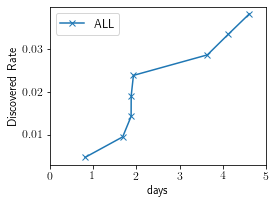

In [112]:
x = (df_puppet["ReportToLast"] + 6).sort_values().tolist()
y = np.arange(1, len(x) + 1) / 210
# y2 = np.arange(1, len(x) + 1)

fig_1 = plt.figure(figsize=(4, 3))
ax = fig_1.subplots()
# ax2 = ax.twinx()

l4, = ax.plot(x, y, marker = "x", label="ALL")
# ax2.plot(x,)

ax.set_xticks(np.arange(0, 6))
ax.set_xlabel("days")
ax.set_ylabel("Discovered Rate")
# ax2.set_ylabel("Discovered Number")
ax.legend()

fig_1.tight_layout()

### Graph 2

+ x-axis: time t = 1,..,6
+ y-axis:
    - f(t)=% of retweets of all sock posts upto time t,regardless of whether the socks where discovered or not.
    - f(t)=% of retweets of all sock posts upto time t which were not discovered by time t
    - f(t)=% of retweets of all sock posts upto time t there were never discovered.

3 curves in all

In [81]:
fig_1.savefig("./figures/graph1.pdf")